In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

In [2]:
stud_math.fillna("") #заменил на пустые клетки где стоит значение nan

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,-6,yes,,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,-6,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,,no,yes,-6,yes,yes,,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,,home,mother,1,3,0,no,yes,yes,yes,yes,-9,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,-6,yes,no,no,4,3,2,5,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,,1,2,2,no,yes,yes,no,yes,-6,yes,no,no,5,5,4,4,212,45
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,-3,yes,yes,no,2,4,5,2,3,80
392,MS,M,21,R,GT3,T,1,1,other,other,course,,1,1,3,,no,no,no,no,-3,,no,no,5,5,3,3,3,35
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,,no,-3,yes,yes,no,4,4,1,5,0,50


In [3]:
#Рассмотрим распределение числовых переменных и удалим выбросы

In [4]:
pd.DataFrame(stud_math.age.value_counts()) #сколько школ наш датасет.

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


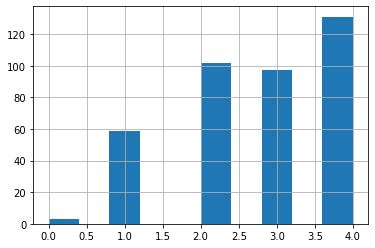

In [5]:
stud_math.Medu.value_counts()
stud_math['Medu'].fillna(stud_math.Medu.median())
stud_math.Medu.hist() #Тут выбросов нет

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

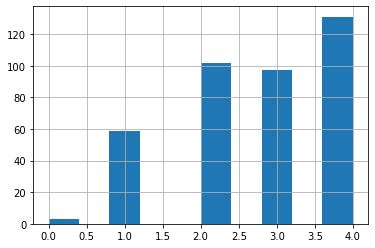

In [6]:
stud_math['Fedu'].fillna(stud_math.Fedu.median())
stud_math['Fedu'].value_counts() 
stud_math.Medu.hist()
stud_math['Fedu'].value_counts()  # тут были выбросы удалил


25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


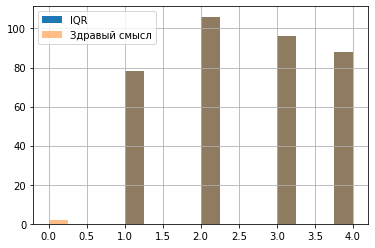

In [7]:
IQR = stud_math['Fedu'].quantile(0.75) - stud_math['Fedu'].quantile(0.25) # тут были выбросы удалил
perc25 = stud_math['Fedu'].quantile(0.25)
perc75 = stud_math['Fedu'].quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math['Fedu'].loc[stud_math['Fedu'].between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 4), label = 'IQR')
 
stud_math['Fedu'].loc[stud_math['Fedu'] <= 100].hist(
alpha = 0.5, bins = 16, range = (0, 4), label = 'Здравый смысл')
 
plt.legend();

stud_math = stud_math.loc[stud_math.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

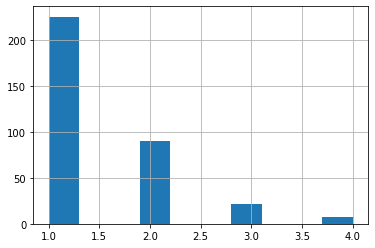

In [8]:
stud_math.traveltime.value_counts()
stud_math.traveltime.fillna(stud_math.traveltime.median())
stud_math.traveltime.hist() #В основном все добираются меньше 15 минут


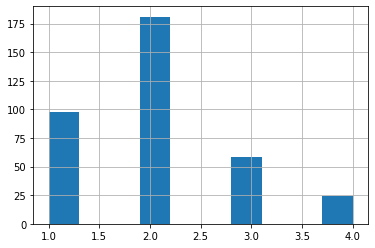

In [9]:
stud_math.studytime.value_counts()
stud_math.studytime.fillna(stud_math.studytime.median())
stud_math.studytime.hist() #В основном время на учебу кроме школы тратят от 2 до 5 часов

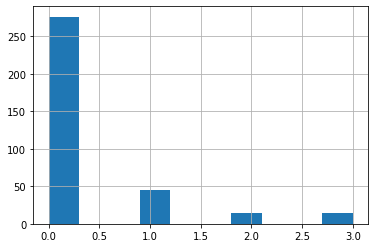

In [10]:
stud_math.failures.hist()

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 5.0,  Границы выбросов: [-3.5, 12.5].


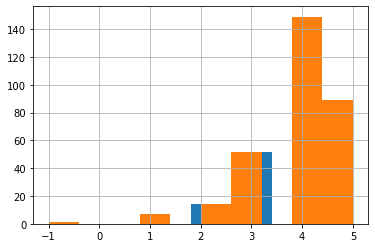

In [41]:
stud_math.famrel.value_counts()
IQR =stud_math.famrel.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.famrel.quantile(0.25)
perc75 = stud_math.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.famrel.loc[stud_math.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (1, 5), label = 'IQR')
stud_math = stud_math.loc[stud_math.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] 
stud_math.famrel.hist() # Тут были отрицательные значения, я удалил их и посчитал квартили убрал выбросы


In [12]:
stud_math = stud_math.loc[stud_math.famrel  <= 5]

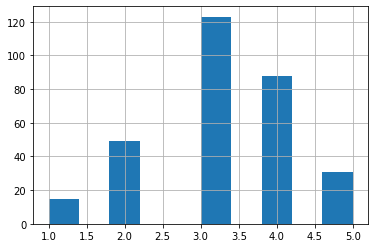

In [42]:
stud_math.freetime.value_counts()
stud_math.freetime.hist() #Тут выбросов нет

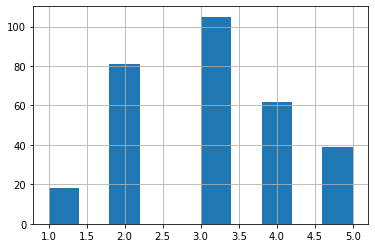

In [43]:
stud_math.goout.value_counts() 
stud_math.goout.hist()
 # Тут выбросов нет

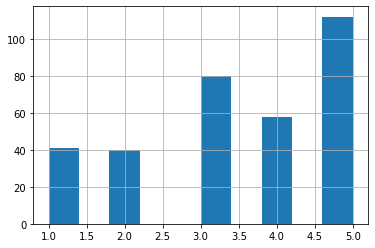

In [15]:
stud_math.health.value_counts()
stud_math.health.hist() #тут выбросов нет

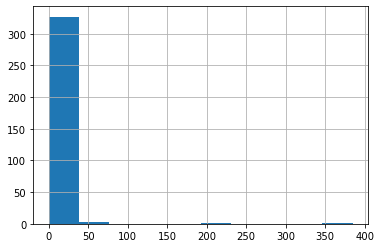

In [16]:
stud_math.absences.describe()
stud_math.absences.hist() # Видим что в основном люди пропускают в диапазоне от 0 до 100 часов есть выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


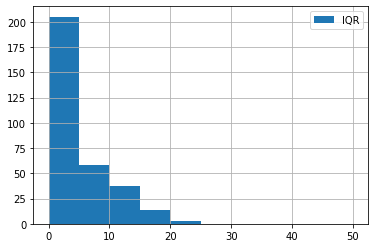

In [17]:
IQR =stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 50), label = 'IQR')
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] 
plt.legend(); #Удаляем выброси по колонке пропущеных занятий

In [18]:
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 65.0,  Границы выбросов: [-57.5, 162.5].


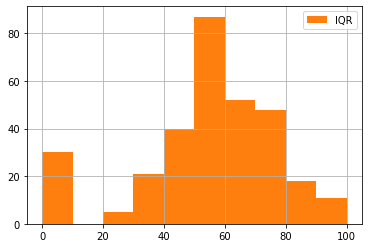

In [19]:
stud_math.score.hist()
stud_math.score.fillna("")
stud_math.score.value_counts() 
IQR =stud_math.score.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), label = 'IQR')
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]  
plt.legend()

In [20]:
#Оцените количество уникальных значений для номинативных переменных.

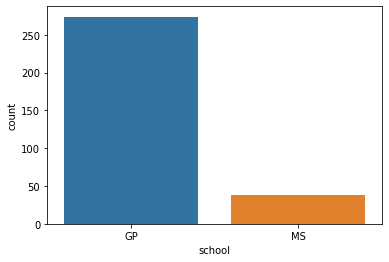

In [21]:
sns.countplot(x = 'school', data = stud_math)


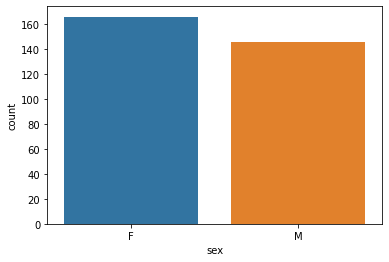

In [22]:
sns.countplot(x = 'sex', data = stud_math) #Женский пол преобладает


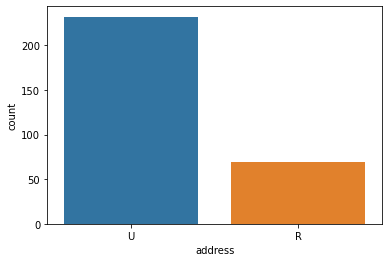

In [23]:
sns.countplot(x = 'address', data = stud_math) #городских жителей больше


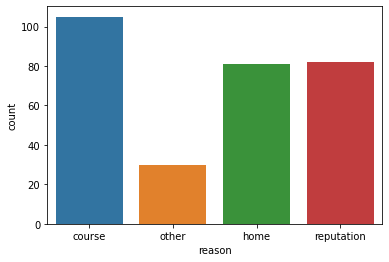

In [24]:
sns.countplot(x = 'reason', data = stud_math) #в основном люди идут учиться из-за курса

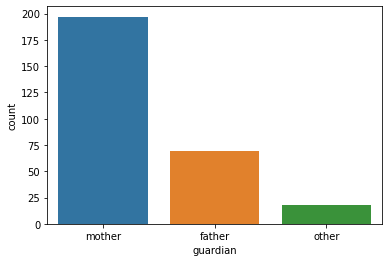

In [25]:
sns.countplot(x = 'guardian', data = stud_math) #попечителем в основном является мать

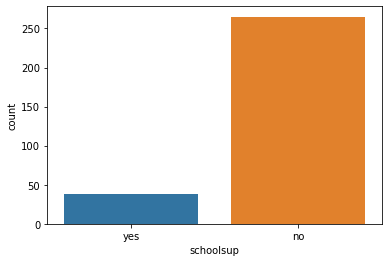

In [26]:
sns.countplot(x = 'schoolsup', data = stud_math) #Поддержка почти отсутствует

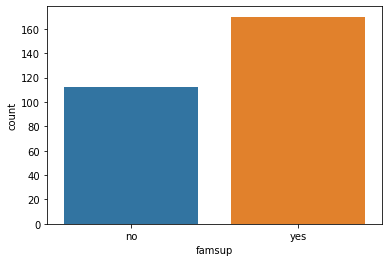

In [27]:
sns.countplot(x = 'famsup', data = stud_math) #Семейная поддержка как правило присутствует

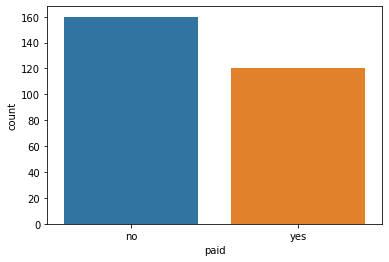

In [28]:
sns.countplot(x = 'paid', data = stud_math) #В осоновном люди не пользуются платными занятиями

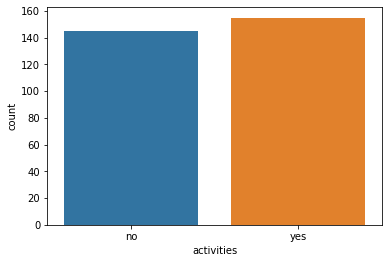

In [29]:
sns.countplot(x = 'activities', data = stud_math) #в основном студенты пользуются внеучебными занятиями

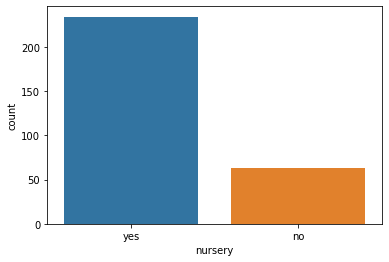

In [30]:
sns.countplot(x = 'nursery', data = stud_math) #В основном люди посещали детский сад

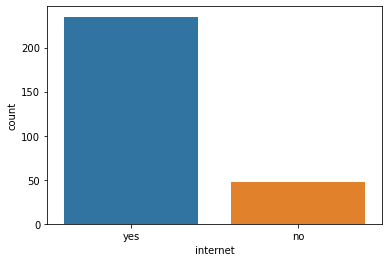

In [31]:
sns.countplot(x = 'internet', data = stud_math) #В основном у студентов есть интернет

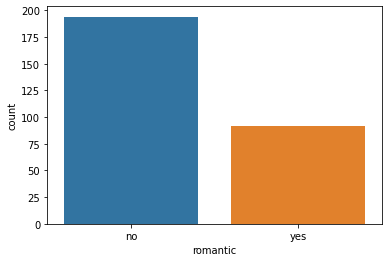

In [32]:
sns.countplot(x = 'romantic', data = stud_math) #В основном люди без пары

In [34]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.153959,-0.193959,0.066305,-0.006988,0.194647,0.006988,0.051377,0.033036,0.088260,-0.068056,0.141556,-0.151069
Medu,-0.153959,1.000000,0.656411,-0.179509,0.094847,-0.233565,-0.094847,-0.006905,0.020748,0.065121,-0.081201,0.095139,0.207725
Fedu,-0.193959,0.656411,1.000000,-0.170628,0.027596,-0.282648,-0.027596,-0.028947,-0.003422,0.016923,-0.016890,-0.013216,0.125766
traveltime,0.066305,-0.179509,-0.170628,1.000000,-0.117530,0.055916,0.117530,-0.046748,0.007810,-0.000711,0.000853,-0.061195,-0.069680
studytime,-0.006988,0.094847,0.027596,-0.117530,1.000000,-0.151736,-1.000000,0.045537,-0.146619,-0.047331,-0.092551,-0.079303,0.123221
failures,0.194647,-0.233565,-0.282648,0.055916,-0.151736,1.000000,0.151736,-0.023203,0.097287,0.070127,0.088875,0.067154,-0.313402
"studytime, granular",0.006988,-0.094847,-0.027596,0.117530,-1.000000,0.151736,1.000000,-0.045537,0.146619,0.047331,0.092551,0.079303,-0.123221
famrel,0.051377,-0.006905,-0.028947,-0.046748,0.045537,-0.023203,-0.045537,1.000000,0.184063,0.099451,0.071219,-0.091063,0.052188
freetime,0.033036,0.020748,-0.003422,0.007810,-0.146619,0.097287,0.146619,0.184063,1.000000,0.283866,0.077040,0.092589,0.045742
goout,0.088260,0.065121,0.016923,-0.000711,-0.047331,0.070127,0.047331,0.099451,0.283866,1.000000,-0.010080,0.055233,-0.122367


In [36]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

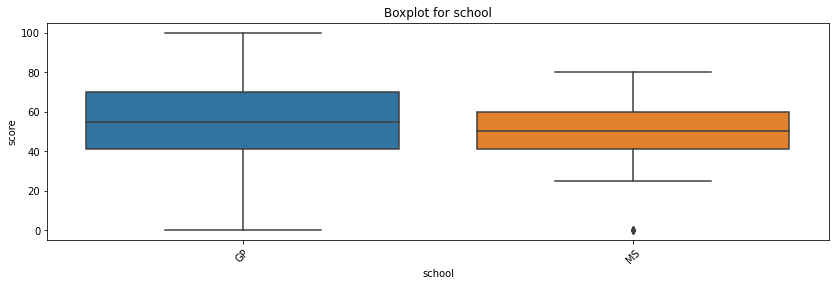

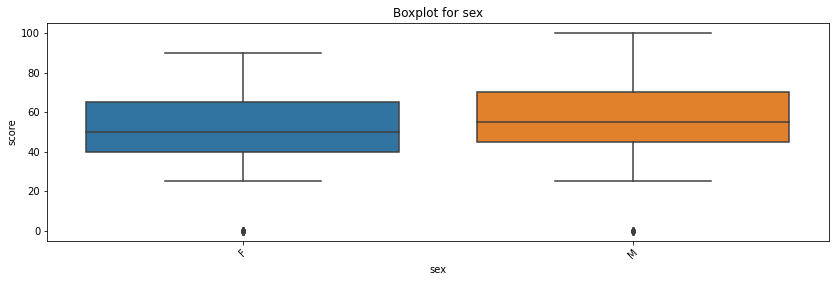

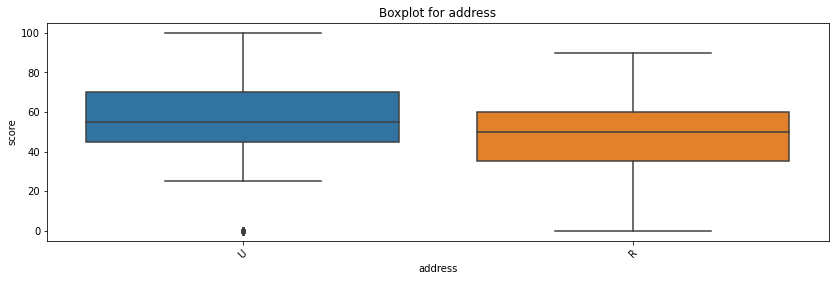

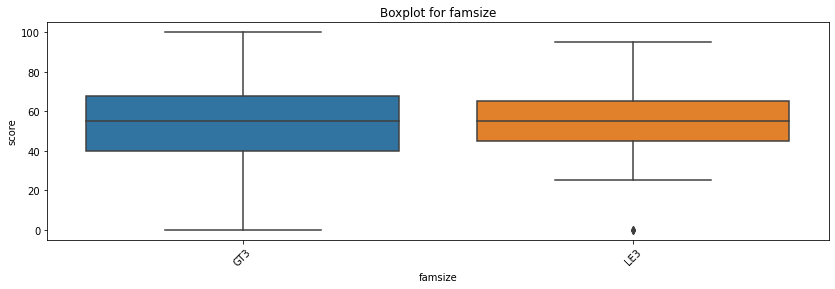

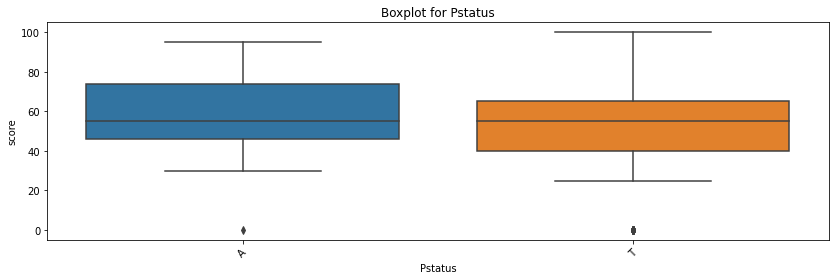

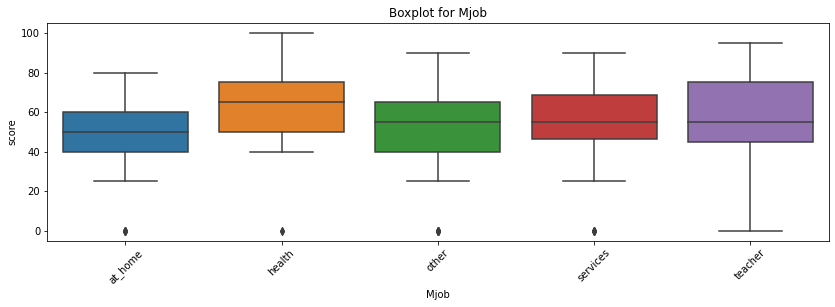

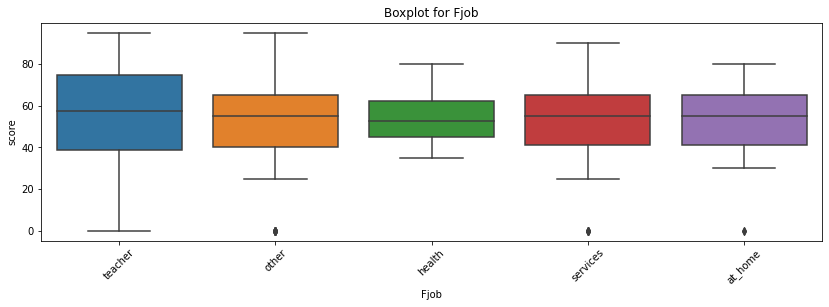

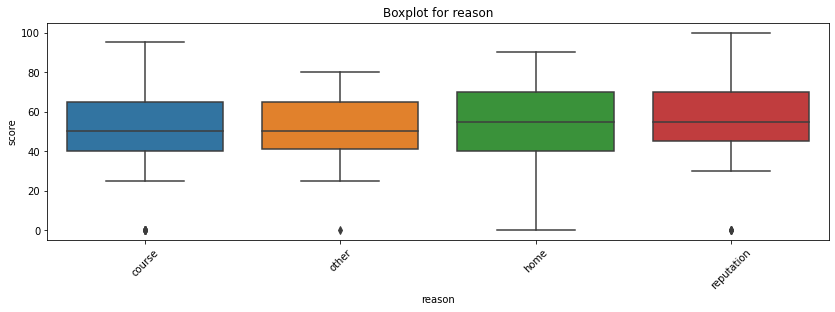

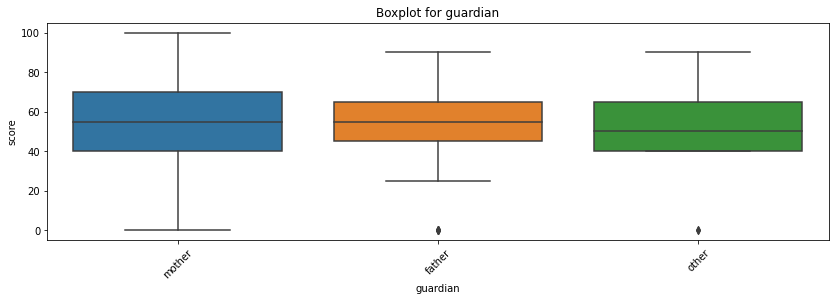

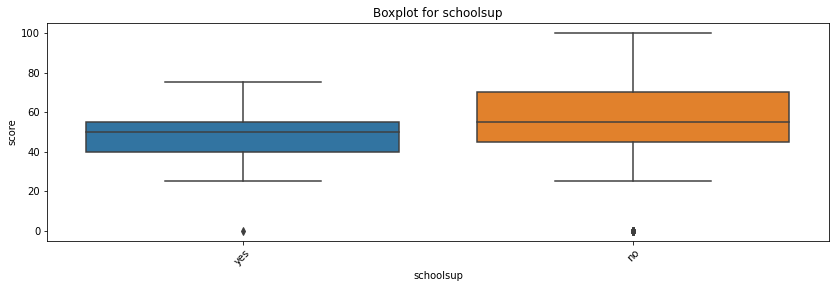

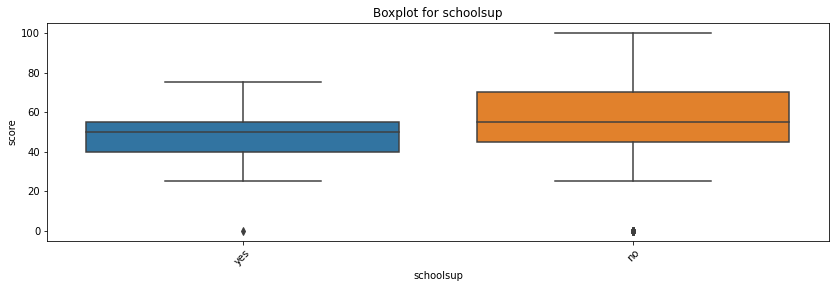

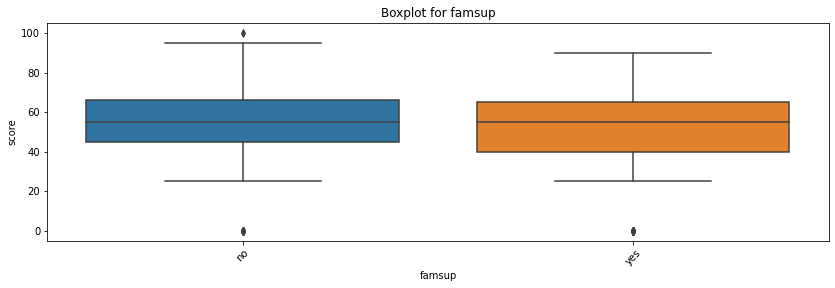

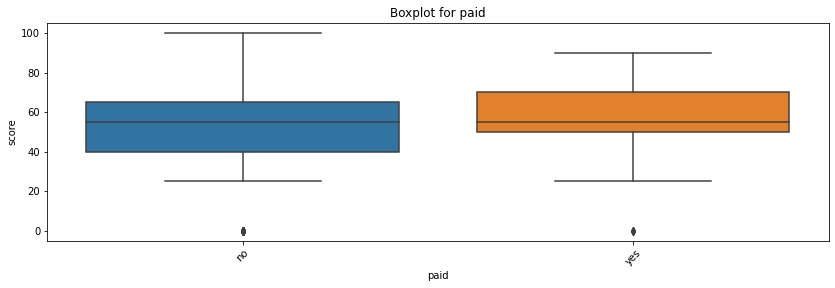

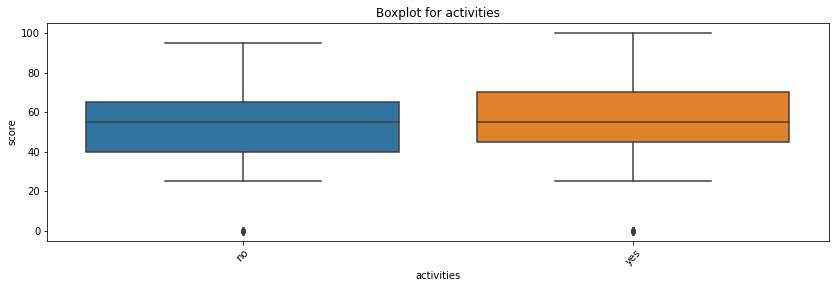

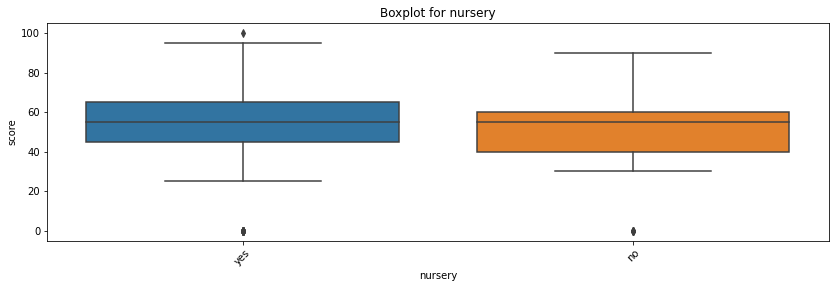

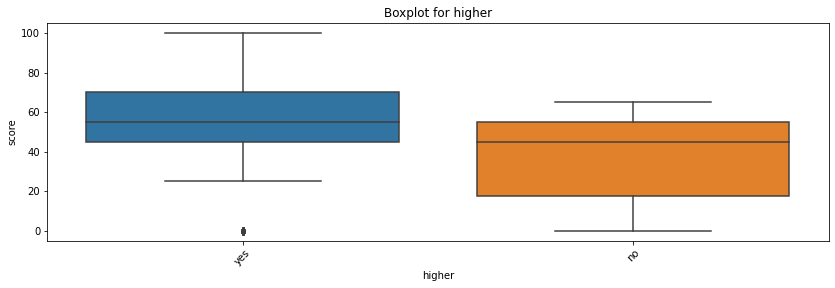

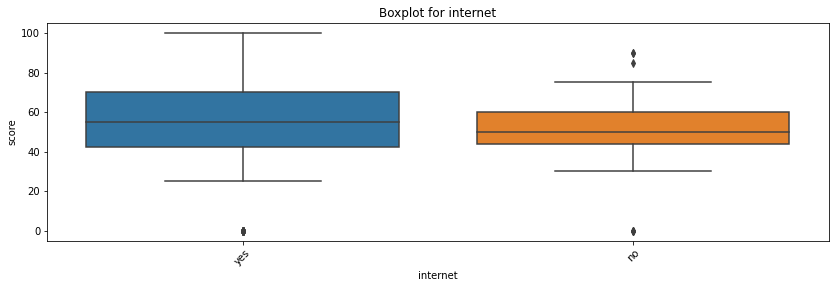

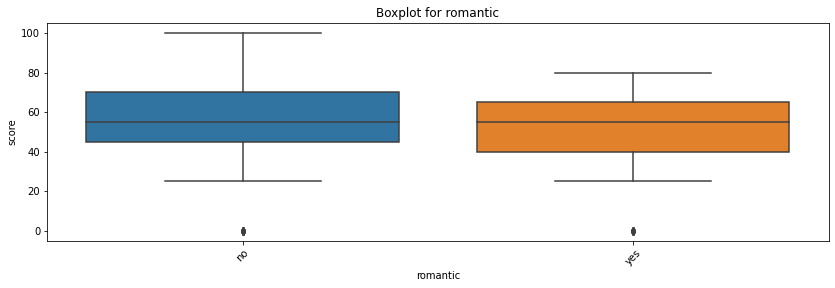

In [37]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

In [38]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [39]:
for col in  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col) #Данные показатели не оказывают влияние на оценку

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


In [ ]:
#В результате EDA для анализа влияния параметров на итоговую получены следующие выводы:
#В данных присутствуют пустые значения, но в целом тех что имеется хватает для выводов.
#Выбросы найдены в некоторых столбцах, образования отца, семейных отношениях и количестве пропущенных занятий.
#Из графика видно, что есть сильная корреляция между образованием родителей, так же есть корреляция между показателем свободного времени
# Так же есть корреляция между failures  и studytime, granular что может говорить о зависимости свободного времени и учебного
# на итоговую оценку влияют такие показатели как образование родителей время учебы и пропуски.